#### <a id='top'></a>

# Homework 2: Data Visualization and Probability Analysis 
***

**Name**: Matt Ceriello

***

This assignment is due on Canvas by **MIDNIGHT on Monday September 14**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<br>

<a id='p1'></a>

## (15 points) Problem 1: Theory (Median Distance)
***

One way we conceptualize many data science questions is asking for the "best choice" of some parameter on data set.  We should be able to justify that our measures of centrality should in some way be the "best" ways to represent the data.


In lecture, we may have discussed the following important property of the mean:


The *sample mean* of data $X_1, X_2, \dots X_n$ is the unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n \left(X_i-c \right)^2. $$

The proof of that claim is as follows:

**Proof:**

Differentiating yields
$$f'(c)=\frac{df}{dc}\sum_{i=1}^n \left(X_i-c \right)^2 =\sum_{i=1}^n-2(X_i-c).$$ 

Setting $f'(c)=0$ gives

$$0=\sum_{i=1}^n-2(X_i-c)$$
$$=2nc-2\sum_{i=1}^n X_i$$
$$\implies\qquad  c=\frac{\sum_{i=1}^n X_i}{n}=\bar{X}$$

***

### Your exercise:

You are tasked with recreating a *similar* proof.  Prove the following:

The *median* of data $X_1, X_2, \dots X_n$ is the possibly non-unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n |X_i-c| $$

A few things to think about:

 - how do we differentiate the absolute value function?
 - what conditions might make the median non-unique in this case?  If it's nonunique, what possible values of $c$ still minimize the function $f$?

**Typeset your proof for Problem 1 in this cell or cells.**

$$f'(c)=\frac{df}{dc}\sum_{i=1}^n |X_i-c| = \sum_{i=1}^n \frac{X_i-c}{|X_i-c|} $$

Now, we set $ f'(c) = 0$ which gives us,

$$ 0 = \sum_{i=1}^n \frac{X_i-c}{|X_i-c|} $$

We now have 2 scenarios for c depending on whether n is odd or even

If n is odd, then $$c = x_{(n+1)/2}$$

If n is even, then $$c = \frac{x_{\frac{n}{2}}+x_\frac{(n+1)}{2}}{2}$$



[Back to top](#top)
<a id='p2'></a>

## (40 pts) Problem 2: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to repreesnt a data problem, and questions of *how* to compute that data value.  Question 1 - and prior lectures - should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**:

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the mean of the data set with $n$ observations?



**Typeset your result for Problem 2A in this cell.**

**SOL:** There would be **n** computations in order to find the mean of dataset with n observations. The addition portion of the mean calculation would take **n - 1** computations and then the final division of n which represents the number of total observations would leave us with **n** total computaions

**Part B**:

Now suppose our data is *streaming*- we slowly add observations one at a time, instead of seeing the entire data set at once.  We are still interested in the mean, so if we stream the data set `[4,6,0,10, ...]`, we first compute the mean of the the first data point `[4]`, then we recompute the mean of the first two points `[4,6]`, then we recompute the mean of three `[4,6,0]`, and so forth.

Suppose we recompute the mean from scratch after each and every one of our $n$ observations are one-by-one added to our data set.  How many floating point operations are spent computing (and re-computing) the mean of the data set?

**Typeset your result for Problem 2B in this cell.**

**SOL:** We can use our findings from Part A in this problem. We figured out it takes n operations to find the mean of a data set with n observations. So, if we are streaming in data to our dataset and recomputing our mean each time, each mean computaion will take n operations where n is the number of observations in our set. So for the first data point, `[4]`, that would take 1 computation, $\frac{4}{1}$. For `[4,6]`, it will take 2 computations, $4 + 6$ and $\frac{10}{2}$. With this pattern, if we are adding the computaions for each iteration, it will be $$1 + 2 + 3 + 4 +...+ n = \frac{n(n + 1)}{2}$$ 
So, in total we would need $\frac{n(n + 1)}{2}$ computaions.

We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

**Result**: The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


A proof of this result is in the [Appendix](#Appendix) after problem 3, and requires some careful manipulations of the sum $\bar{x}_n$.  Your task will be to computationally verify and utilize this result.

**Part C**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). You may **not** use any built-in sample mean or variance functions.

In [2]:
#Your code here
def my_sample_mean(arr):
    n = len(arr)
    total = 0
    for x in arr:
        total += x
    mean = total/n
    return mean

arr2 = [1,2,3,4,5,6,7,8,9,10]

def my_sample_var(arr1):
    n1 = len(arr1)
    total1 = 0
    for x1 in arr1:
        total1 += x1
    mean1 = total1/n1
    var = 0
    for y in arr1:
        var += ((y - mean1)**2)
    sv = (var/(n1-1))
    return sv




**Part D**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon.

`bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42]`

In [3]:
#Your code here
bus = [312, 4, 10, 0, 22, 39, 81, 19, 8, 60, 80, 42]

print("The sample mean of the minutes late the BuffBus runs on Friday afternoon is: " + str(my_sample_mean(bus)))
print("The sample variance of the minutes late the BuffBus runs on Friday afternoon is: " + str(my_sample_var(bus)))

The sample mean of the minutes late the BuffBus runs on Friday afternoon is: 56.416666666666664
The sample variance of the minutes late the BuffBus runs on Friday afternoon is: 7274.628787878787


**Part E**: Implement a third function called `update_mean` that implements the formula discussed after part B. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. This function may be auto-graded, so please do not change the given header API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first buff buses' lateness, the first two buff buses' lateness, the first three buff buses' lateness, and so on up to all of the `bus` data points from **Part D**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 12 estimates in `buffbus_bad_means`.

In [4]:
# Given API:
def update_mean(prev_mean, xn, n):
    #Your code here to compute updates
    temp = (xn - prev_mean)/n
    now_mean = prev_mean + temp
    return now_mean

#Your code here (to loop over the full data)
length = len(bus)
buffbus_bad_means = [0] * length
prev = 0
count = 0
for xn in bus:
    curr = update_mean(prev, xn, count + 1)
    prev = curr
    buffbus_bad_means[count] = curr
    count+= 1
print("By printing the last element in buffbus_bad_means we can see that our mean is equal to that of part c:\n" + str(buffbus_bad_means[count-1]))

By printing the last element in buffbus_bad_means we can see that our mean is equal to that of part c:
56.416666666666664


**You may report any results for part E here, if not done using print() statements**

To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [5]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part F**:

How many floating point operations were spent computing the final result in your code in **part E**?  Is this truly better than the uninformed approach from **part B**?



**Typeset your analysis to part F in this cell or cells**

**SOL:** There were 5n floating point operations in part E, where n equaled how many elements are in the array. This is better than our answer from part b especially as we approach large n.

[Back to top](#top)

<a id='p3'></a>

## (40 pts) Problem 3: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [6]:
filepath = 'titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [7]:
#Your Code here
total = 0
count
for index, row in df.iterrows(): 
    if (row["Survived"] == 1):
        count += 1
    total += 1
prob = count/total
print("Based on the population of the passengers, the probability of survival was: " + str(prob))

Based on the population of the passengers, the probability of survival was: 0.4062850729517396


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**Typeset your responses here**

**SOL:** For class warfare, the data would reflect that the probability of survival was much higher for people in first class than those of lower classes. For male chivalry, the data would reflect that the probability of surrvival was much higher if your were female as compared to being a male. These events are not mutally exclusive because there could have been class warfare and makle chivalry. For example, a male in first class goes to take a lifeboat but gives it up for a woman who is also in first class. 

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [8]:
#Your Code here
dfTitanic = df.dropna(how='any', subset=['Survived','Pclass','Age','Sex'])
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [9]:
#Your Code here
#Survival of Men on board
total = 0
count = 0
for index, row in dfTitanic.iterrows(): 
    if (row['Survived'] == 1 and row['Sex'] == 'male'):
        count += 1    
    if(row['Sex'] == 'male'):
        total += 1
prob = count/total
print("Based on the population of the men on board, the probability of survival was: " + str(prob))

#female survival rate
total1 = 0
count1 = 0
for index1, row1 in dfTitanic.iterrows(): 
    if (row1['Survived'] == 1 and row1['Sex'] == 'female'):
        count1 += 1    
    if(row1['Sex'] == 'female'):
        total1 += 1
prob1 = count1/total1
print("Based on the population of the women on board, the probability of survival was: " + str(prob1))

#class 1 survival rate
total2 = 0
count2 = 0
for index2, row2 in dfTitanic.iterrows(): 
    if (row2['Survived'] == 1 and row2['Pclass'] == 1):
        count2 += 1    
    if(row2['Pclass'] == 1):
        total2 += 1
prob2 = count2/total2
print("Based on the population of the people in first class, the probability of survival was: " + str(prob2))

#class 2 survival
total3 = 0
count3 = 0
for index3, row3 in dfTitanic.iterrows(): 
    if (row3['Survived'] == 1 and row3['Pclass'] == 2):
        count3 += 1    
    if(row3['Pclass'] == 2):
        total3 += 1
prob3 = count3/total3
print("Based on the population of the people in second class, the probability of survival was: " + str(prob3))

#class 3 survival
total4 = 0
count4 = 0
for index4, row4 in dfTitanic.iterrows(): 
    if (row4['Survived'] == 1 and row4['Pclass'] == 3):
        count4 += 1    
    if(row4['Pclass'] == 3):
        total4 += 1
prob4 = count4/total4
print("Based on the population of the people in third class, the probability of survival was: " + str(prob4))

print("\n")

#men first class survival
total5 = 0
count5 = 0
for index5, row5 in dfTitanic.iterrows(): 
    if (row5['Survived'] == 1 and row5['Pclass'] == 1 and row5['Sex'] == 'male'):
        count5 += 1    
    if(row5['Pclass'] == 1 and row5['Sex'] == 'male'):
        total5 += 1
prob5 = count5/total5
print("For men in first class, the probability of survival was: " + str(prob5))


#men second class survival
total6 = 0
count6 = 0
for index6, row6 in dfTitanic.iterrows(): 
    if (row6['Survived'] == 1 and row6['Pclass'] == 2 and row6['Sex'] == 'male'):
        count6 += 1    
    if(row6['Pclass'] == 2 and row6['Sex'] == 'male'):
        total6 += 1
prob6 = count6/total6
print("For men in second class, the probability of survival was: " + str(prob6))


#men third class survival
total7 = 0
count7 = 0
for index7, row7 in dfTitanic.iterrows(): 
    if (row7['Survived'] == 1 and row7['Pclass'] == 3 and row7['Sex'] == 'male'):
        count7 += 1    
    if(row7['Pclass'] == 3 and row7['Sex'] == 'male'):
        total7 += 1
prob7 = count7/total7
print("For men in third class, the probability of survival was: " + str(prob7))


#women first class survival
total8 = 0
count8 = 0
for index8, row8 in dfTitanic.iterrows(): 
    if (row8['Survived'] == 1 and row8['Pclass'] == 1 and row8['Sex'] == 'female'):
        count8 += 1    
    if(row8['Pclass'] == 1 and row8['Sex'] == 'female'):
        total8 += 1
prob8 = count8/total8
print("For women in first class, the probability of survival was: " + str(prob8))


#women second class survival
total9 = 0
count9 = 0
for index9, row9 in dfTitanic.iterrows(): 
    if (row9['Survived'] == 1 and row9['Pclass'] == 2 and row9['Sex'] == 'female'):
        count9 += 1    
    if(row9['Pclass'] == 2 and row9['Sex'] == 'female'):
        total9 += 1
prob9 = count9/total9
print("For women in second class, the probability of survival was: " + str(prob9))


#women third class survival
total10 = 0
count10 = 0
for index10, row10 in dfTitanic.iterrows(): 
    if (row10['Survived'] == 1 and row10['Pclass'] == 3 and row10['Sex'] == 'female'):
        count10 += 1    
    if(row10['Pclass'] == 3 and row10['Sex'] == 'female'):
        total10 += 1
prob10 = count10/total10
print("For women in third class, the probability of survival was: " + str(prob10))



Based on the population of the men on board, the probability of survival was: 0.19654427645788336
Based on the population of the women on board, the probability of survival was: 0.749003984063745
Based on the population of the people in first class, the probability of survival was: 0.6428571428571429
Based on the population of the people in second class, the probability of survival was: 0.4827586206896552
Based on the population of the people in third class, the probability of survival was: 0.2518703241895262


For men in first class, the probability of survival was: 0.3870967741935484
For men in second class, the probability of survival was: 0.1839080459770115
For men in third class, the probability of survival was: 0.13780918727915195
For women in first class, the probability of survival was: 0.96
For women in second class, the probability of survival was: 0.9310344827586207
For women in third class, the probability of survival was: 0.5254237288135594


**Typeset your responses here**

**(i)** When reviewing class survival probability, my result from part a is very close to the average of the survival rates for each class.

**(ii)** For gender survival probability, my result from part a was a little bit farther off but still close to the average of the survival rates for each gender.

**(iii)** Women were more likely to survive than men in all three classes.

**(iv)** Women in third class were more likely to survive than men in first class.

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

Text(0,0.5,'Density')

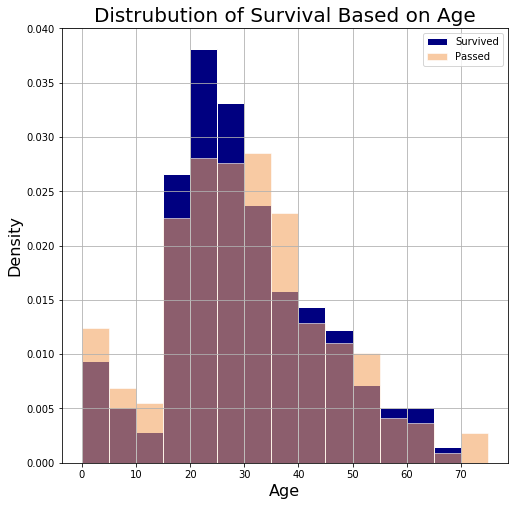

In [10]:
my_bins = range(0,80,5)
#Your Code here
fig, ax = plt.subplots(figsize=(8,8))
colors = ['Survived','Passed']
dfTitanic.loc[dfTitanic["Survived"] == 1].hist(column="Age", ax=ax, facecolor="navy"\
                              , edgecolor="white",alpha = 1,density=True, bins=my_bins, label = colors)
dfTitanic.loc[dfTitanic["Survived"] == 0].hist(column="Age", ax=ax, facecolor="sandybrown"\
                               , edgecolor="white",alpha = .575,density=True, bins=my_bins, label = colors)
ax.legend(colors)
ax.set_title("Distrubution of Survival Based on Age", fontsize=20)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Density", fontsize=16)


We can clearly see from the graph that elderly people and yound children were the least likely to survive. The most likely to survive were people in the age range of 20-35. You also notice that babies had a higher chance of surivival than children in the 10-15 range. This could be because women and babies were let onto the lifeboats first.

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Typeset your responses here**

**SOL:** It would be misleading to plot a frequency histogram here becuase we are interested in the probability of survival not the raw numbers of people who survived and who didn't.

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**Typeset your responses here**

**SOL:** Based on all the data collected in the previous parts of the question, you can conclude that their was class bias, male chivalry, and age bias. For class bias, the chance of survival increased as your class increased. For male chivalry, the probability of survival for a woman was much greater than that of a man. And for age bias, we saw that people in the age range of 20-35 were most likely to survive. 

**P.S.** It is not a component of your graded assignment, but the 1997 James Cameron film _Titanic_ captured some of these very notions in some riveting cinema. Whether or not you found evidence for these cases in the data, you might find it interesting to watch the movie (or just the segments of the sinking) to see one interpretation of these ideas. You can perhaps see how we might be persuaded to reinterpret the evidence of data by a heart-wrenching performance from a handsome young Leonardo DiCaprio!

<a id='Appendix'></a>

## Appendix 

*Goal*: Prove that 
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}

